In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Downloads/Health_Supplement_Sales.csv')

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [2]:
# Summary statistics
print(df.describe())
print(df.info())
print(df.nunique())

                      Date   Units Sold        Price       Revenue  \
count                 4384  4384.000000  4384.000000   4384.000000   
mean   2022-08-18 12:00:00   150.200274    34.781229   5226.569446   
min    2020-01-06 00:00:00   103.000000    10.000000   1284.000000   
25%    2021-04-26 00:00:00   142.000000    22.597500   3349.372500   
50%    2022-08-18 12:00:00   150.000000    34.720000   5173.140000   
75%    2023-12-11 00:00:00   158.000000    46.712500   7009.960000   
max    2025-03-31 00:00:00   194.000000    59.970000  10761.850000   
std                    NaN    12.396099    14.198309   2192.491946   

          Discount  Units Returned  
count  4384.000000     4384.000000  
mean      0.124398        1.531478  
min       0.000000        0.000000  
25%       0.060000        1.000000  
50%       0.120000        1.000000  
75%       0.190000        2.000000  
max       0.250000        8.000000  
std       0.071792        1.258479  
<class 'pandas.core.frame.DataFrame'

In [3]:
# Missing values check
print(df.isnull().sum())

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


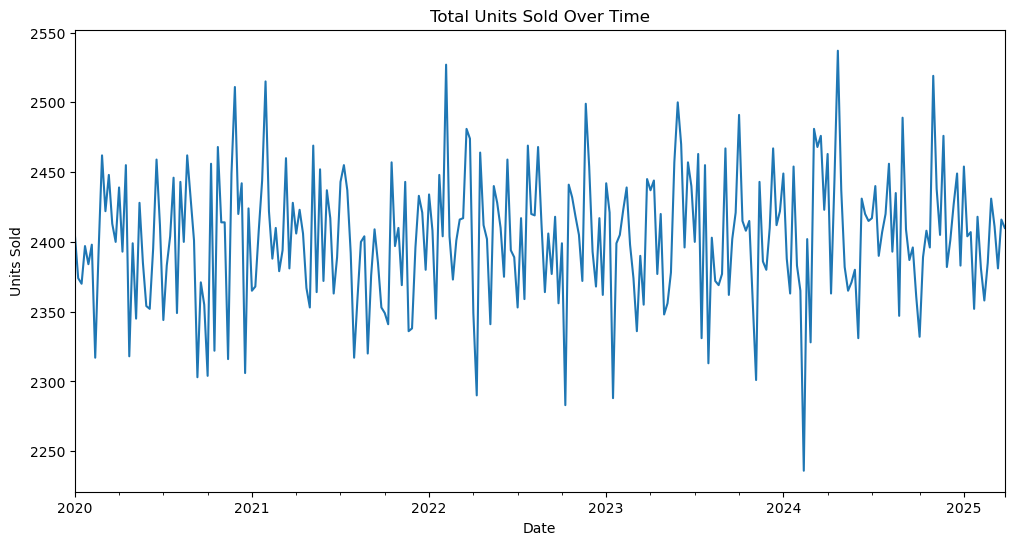

In [4]:
# Total units sold over time
plt.figure(figsize=(12,6))
df.groupby('Date')['Units Sold'].sum().plot()
plt.title('Total Units Sold Over Time')
plt.ylabel('Units Sold')
plt.xlabel('Date')
plt.show()

C:\Users\namra\AppData\Local\Temp\ipykernel_19580\3912959979.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Units Sold', data=df, estimator=sum, ci=None)


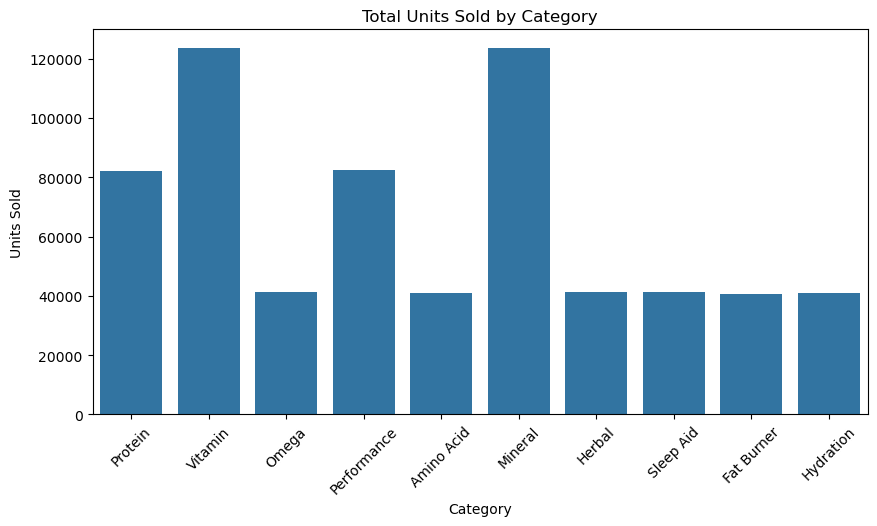

In [5]:
# Units sold by category
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Units Sold', data=df, estimator=sum, ci=None)
plt.title('Total Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

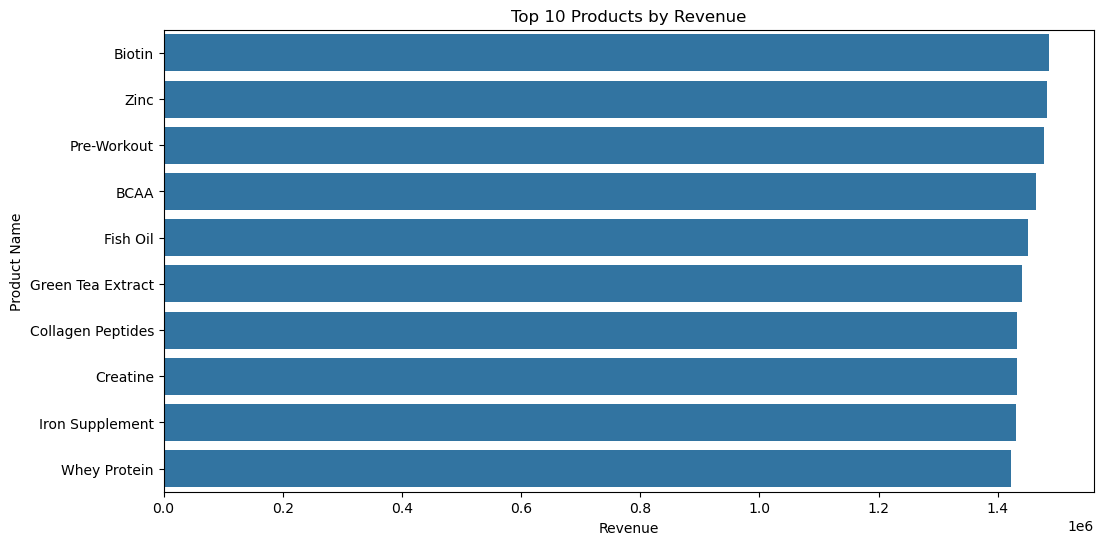

In [6]:
# Top 10 products by revenue
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='Revenue', y='Product Name')
plt.title('Top 10 Products by Revenue')
plt.show()

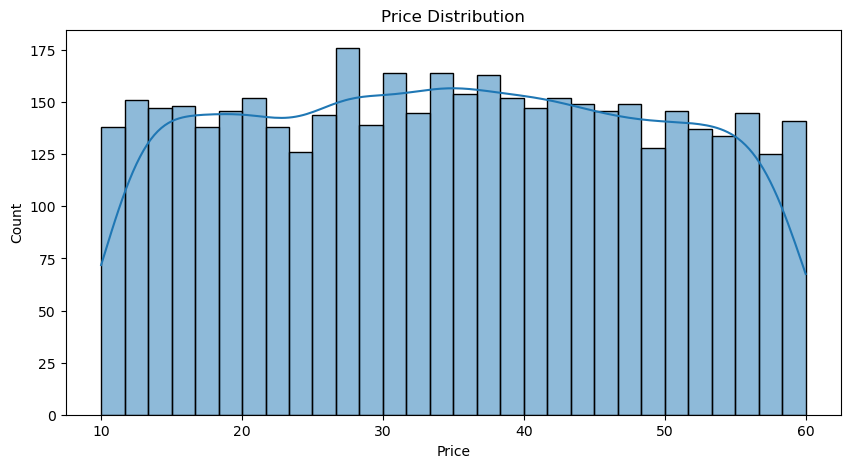

In [7]:
# Price distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

In [8]:
# Pricing volatility: price std deviation per product
price_volatility = df.groupby('Product Name')['Price'].std().sort_values(ascending=False).head(10)
print("Top 10 products by price volatility:\n", price_volatility)


Top 10 products by price volatility:
 Product Name
Multivitamin          14.765707
Green Tea Extract     14.665697
Melatonin             14.601980
Creatine              14.462800
Pre-Workout           14.419886
BCAA                  14.386336
Collagen Peptides     14.384877
Electrolyte Powder    14.353679
Fish Oil              14.275711
Vitamin C             14.116442
Name: Price, dtype: float64


C:\Users\namra\AppData\Local\Temp\ipykernel_19580\1794761901.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Units Sold', data=df, estimator=sum, ci=None)


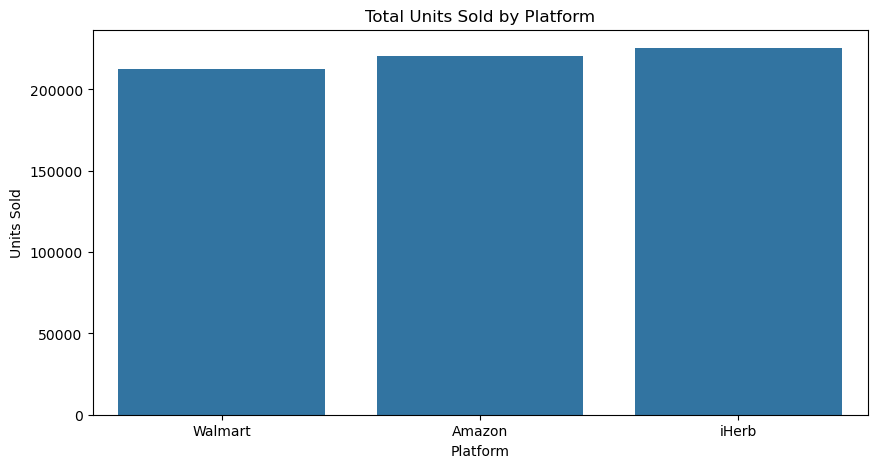

In [9]:
# Sales by platform
plt.figure(figsize=(10,5))
sns.barplot(x='Platform', y='Units Sold', data=df, estimator=sum, ci=None)
plt.title('Total Units Sold by Platform')
plt.show()

C:\Users\namra\AppData\Local\Temp\ipykernel_19580\3147487843.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Name', y='Units Returned', data=df, estimator=sum, ci=None)


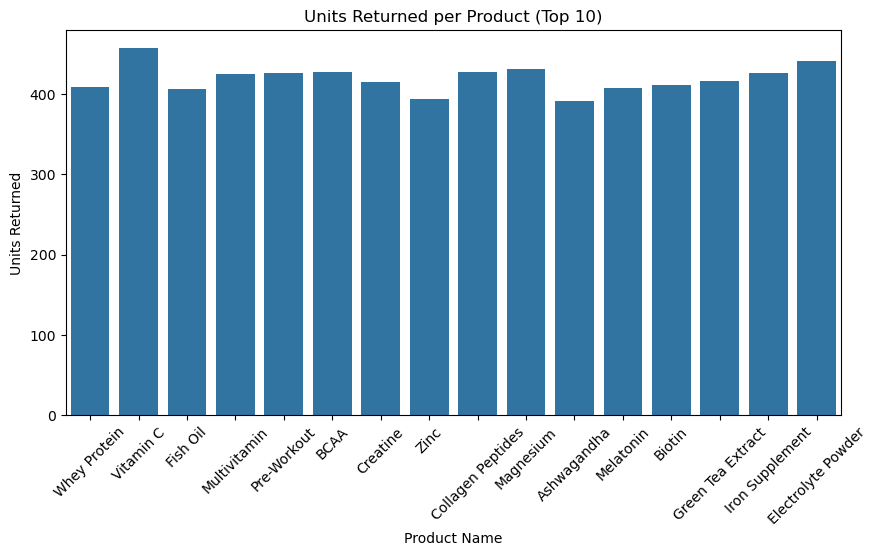

In [10]:
# Returns analysis
plt.figure(figsize=(10,5))
sns.barplot(x='Product Name', y='Units Returned', data=df, estimator=sum, ci=None)
plt.title('Units Returned per Product (Top 10)')
plt.xticks(rotation=45)
plt.show()
